In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file into a DataFrame (replace 'your_file.csv' with your actual file path)
df = pd.read_csv('travel_data (3).csv')

# 1. Calculate the average budget
avg_budget = df['budget'].mean()
print(f'Average Budget: {avg_budget:.2f}')

# 2. Calculate the average duration of trip
avg_duration = df['duration_of_trip'].mean()
print(f'Average Duration: {avg_duration:.2f} days')

# 3. Calculate the average age
avg_age = df['age'].mean()
print(f'Average Age: {avg_age:.2f} years')

# 4. Count of each unique interest
interest_counts = df['interest'].value_counts()
print('\nCount of Each Unique Interest:')
print(interest_counts)

# 5. Count of each unique travel type
travel_type_counts = df['travel_type'].value_counts()
print('\nCount of Each Unique Travel Type:')
print(travel_type_counts)

# 6. Count of each unique accommodation type
accommodation_counts = df['accommodation_type'].value_counts()
print('\nCount of Each Unique Accommodation Type:')
print(accommodation_counts)


Average Budget: 3480.94
Average Duration: 8.99 days
Average Age: 38.54 years

Count of Each Unique Interest:
interest
relaxation           178
culture              171
theme park           169
site seeing          165
adventure            160
family activities    157
Name: count, dtype: int64

Count of Each Unique Travel Type:
travel_type
flight    356
car       335
train     309
Name: count, dtype: int64

Count of Each Unique Accommodation Type:
accommodation_type
villa      267
resort     247
air bnb    246
hotel      240
Name: count, dtype: int64


In [12]:
# Create bins for age
age_bins = [18, 35, 70]
age_labels = ['18-35', '36-70']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)
print('\nAge Groups Assigned:')
print(df[['age', 'age_group']].head())


Age Groups Assigned:
   age age_group
0   18       NaN
1   36     36-70
2   41     36-70
3   25     18-35
4   26     18-35


C:\Users\Andre\AppData\Local\Temp\ipykernel_32656\3950764476.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('age_group')[['budget', 'duration_of_trip']].mean()


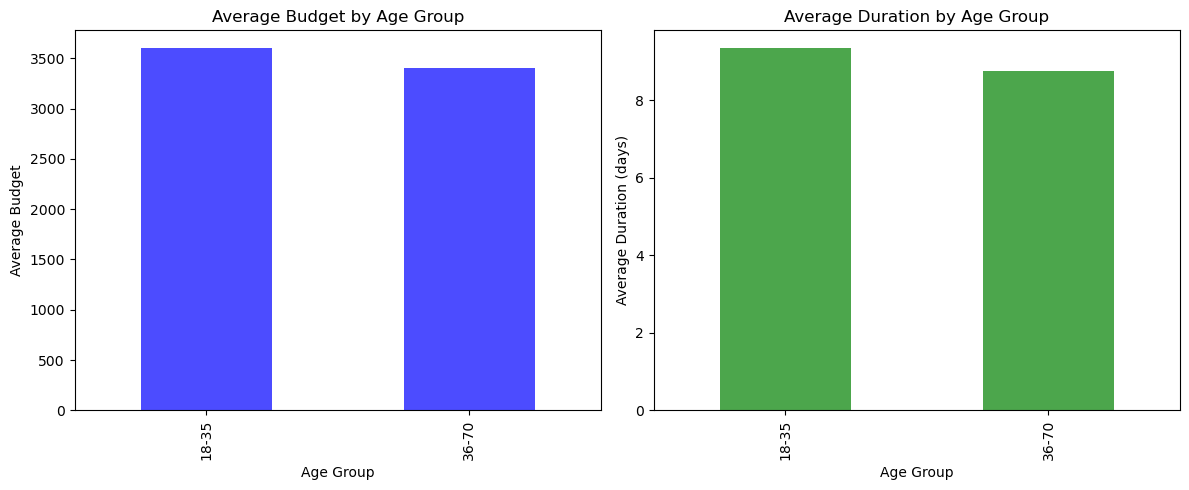

In [14]:
# Group by age_group and calculate average budget and duration
grouped_df = df.groupby('age_group')[['budget', 'duration_of_trip']].mean()

# Plot bar charts
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

grouped_df['budget'].plot(kind='bar', ax=ax[0], color='blue', alpha=0.7)
ax[0].set_title('Average Budget by Age Group')
ax[0].set_ylabel('Average Budget')
ax[0].set_xlabel('Age Group')


grouped_df['duration_of_trip'].plot(kind='bar', ax=ax[1], color='green', alpha=0.7)
ax[1].set_title('Average Duration by Age Group')
ax[1].set_ylabel('Average Duration (days)')
ax[1].set_xlabel('Age Group')

plt.tight_layout()
plt.show()


In [16]:
# Save the charts as PDF images
fig.savefig('age_group_analysis.pdf')

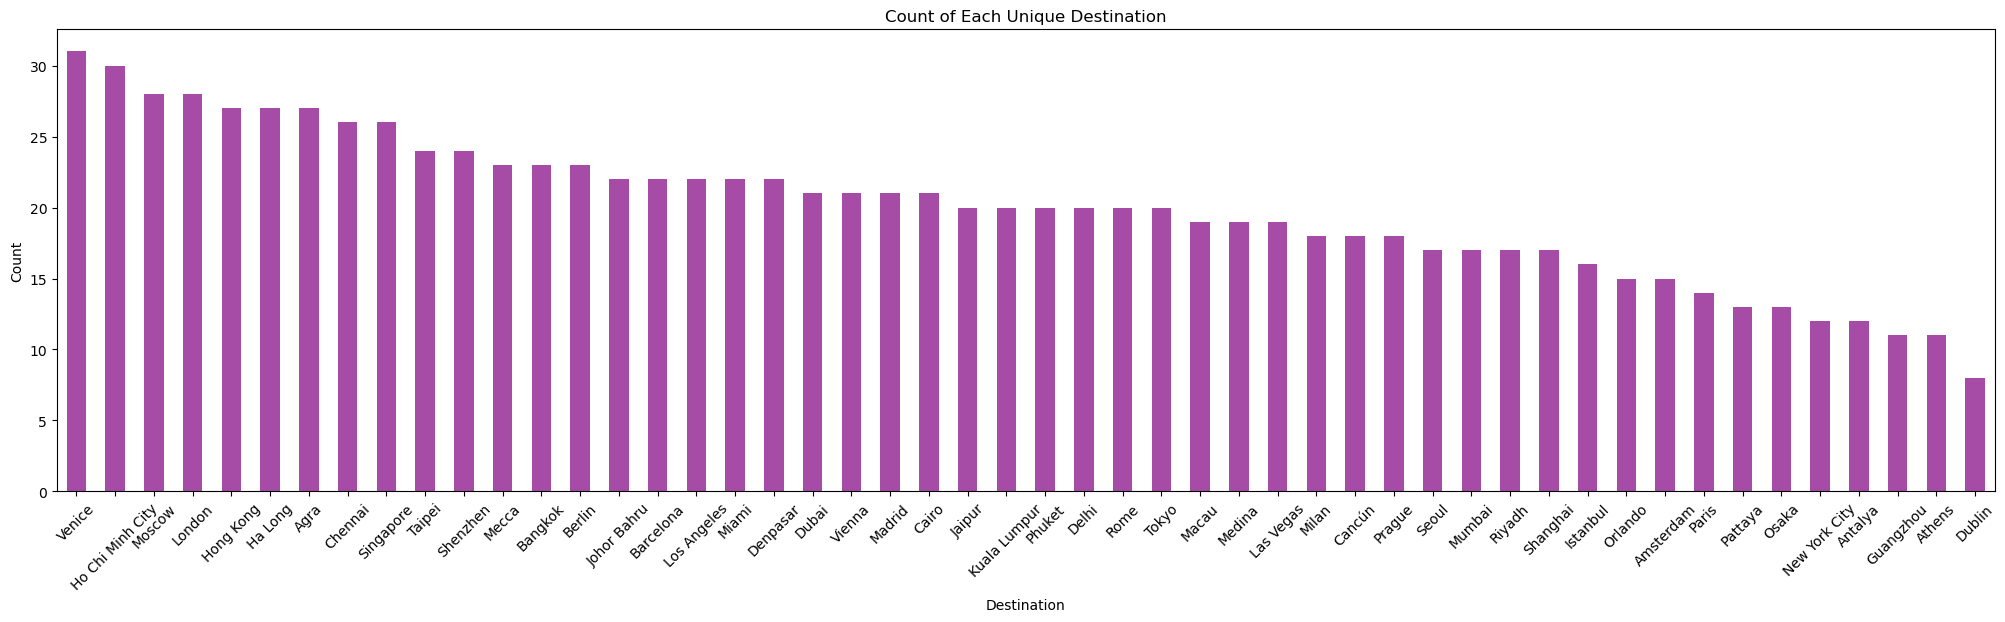

In [24]:
# Count occurrences of each unique destination
destination_counts = df['destination'].value_counts()

# Plot bar chart for destination counts
plt.figure(figsize=(25, 6))
destination_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Count of Each Unique Destination')
plt.ylabel('Count')
plt.xlabel('Destination')
plt.xticks(rotation=45)


# Save the destination count chart as a PDF
plt.savefig('destination_counts.pdf')

plt.show()


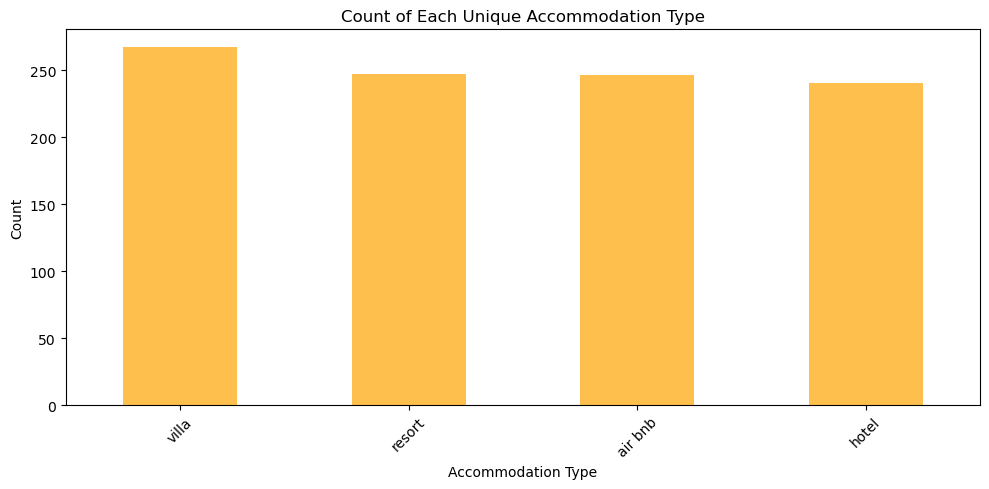

In [26]:
# Plot bar chart for accommodation type counts
plt.figure(figsize=(10, 5))
accommodation_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Count of Each Unique Accommodation Type')
plt.ylabel('Count')
plt.xlabel('Accommodation Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the accommodation count chart as a PDF
plt.savefig('accommodation_counts.pdf')

plt.show()

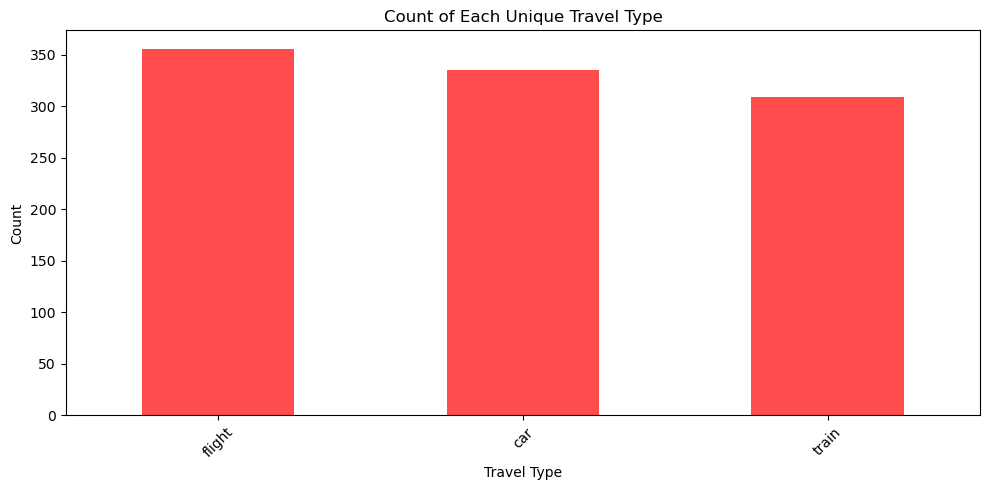

In [28]:
# Plot bar chart for travel type counts
plt.figure(figsize=(10, 5))
travel_type_counts.plot(kind='bar', color='red', alpha=0.7)
plt.title('Count of Each Unique Travel Type')
plt.ylabel('Count')
plt.xlabel('Travel Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the travel type count chart as a PDF
plt.savefig('travel_type_counts.pdf')

plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('travel_data (3).csv')

# Create Age Groups
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Generate and save charts individually by age groups
for age_group in labels:
    df_age_group = df[df['age_group'] == age_group]
    if df_age_group.empty:
        continue

    # 1. Most Popular Destinations
    plt.figure(figsize=(12, 6))
    destination_counts = df_age_group['destination'].value_counts()
    destination_counts[:10].plot(kind='bar', color='blue', alpha=0.7)
    plt.xlabel("Destination")
    plt.ylabel("Count")
    plt.title(f"Top 10 Most Visited Destinations - Age Group {age_group}")
    plt.xticks(rotation=45)
    plt.savefig(f"top_destinations_{age_group}.pdf")
    plt.close()

    # 2. Average Budget by Travel Type
    plt.figure(figsize=(12, 6))
    avg_budget_travel = df_age_group.groupby('travel_type')['budget'].mean().sort_values()
    avg_budget_travel.plot(kind='bar', color='green', alpha=0.7)
    plt.xlabel("Travel Type")
    plt.ylabel("Average Budget")
    plt.title(f"Average Budget by Travel Type - Age Group {age_group}")
    plt.xticks(rotation=45)
    plt.savefig(f"average_budget_travel_type_{age_group}.pdf")
    plt.close()

    # 3. Accommodation Preferences by Budget
    plt.figure(figsize=(12, 6))
    avg_budget_accommodation = df_age_group.groupby('accommodation_type')['budget'].mean().sort_values()
    avg_budget_accommodation.plot(kind='bar', color='purple', alpha=0.7)
    plt.xlabel("Accommodation Type")
    plt.ylabel("Average Budget")
    plt.title(f"Average Budget by Accommodation Type - Age Group {age_group}")
    plt.xticks(rotation=45)
    plt.savefig(f"accommodation_budget_{age_group}.pdf")
    plt.close()

    # Average Trip Duration by Travel Type
    plt.figure(figsize=(12, 6))
    avg_duration_travel = df_age_group.groupby('travel_type')['duration_of_trip'].mean().sort_values()
    avg_duration_travel.plot(kind='bar', color='red', alpha=0.7)
    plt.xlabel("Travel Type")
    plt.ylabel("Average Duration (Days)")
    plt.title(f"Average Trip Duration by Travel Type - Age Group {age_group}")
    plt.xticks(rotation=45)
    plt.savefig(f"trip_duration_{age_group}.pdf")
    plt.close()

    # Budget Variation by Interest
    plt.figure(figsize=(12, 6))
    avg_budget_interest = df_age_group.groupby('interest')['budget'].mean().sort_values()
    avg_budget_interest.plot(kind='bar', color='cyan', alpha=0.7)
    plt.xlabel("Interest")
    plt.ylabel("Average Budget")
    plt.title(f"Average Budget by Interest - Age Group {age_group}")
    plt.xticks(rotation=45)
    plt.savefig(f"budget_by_interest_{age_group}.pdf")
    plt.close()

# Overall Travelers by Age Group
plt.figure(figsize=(12, 6))
age_group_counts = df['age_group'].value_counts().sort_index()
age_group_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Travelers by Age Group")
plt.savefig("travelers_by_age_group.pdf")
plt.close()

print("All charts saved successfully as individual PDF files.")



All charts saved successfully as individual PDF files.
